In [185]:
"""
STEP 0: SCELTA UNIVERSITA'
QUERIES:
GRAFICI E VISUALIZZAZIONI:
FILES UTILIZZATI: output.nq

"""

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")
xs = Namespace("http://www.w3.org/2001/XMLSchema#")

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format
result = g.parse("artchives_output.nq", format='nquads')



In [186]:
#QUERY 0: HOW WE CHOSE THE UNIVERSITY: OCCURRENCES. 

#QUERY 0 version 1: select all named entities and then choose the ones with "University" in the name

query_results = g.query(
    """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX xs: <http://www.w3.org/2001/XMLSchema#>
SELECT ?entity ?string
WHERE {
?entity rdfs:label ?string.
}
""")



In [187]:
#start creating a dictionaru with all the university, where the key is the wikidata code while the value is a list of values, the first of which is a string with the name of the university
university_dict= {}
for query_res in query_results:
    if "entity" in str(query_res[0]):
        if "University" in str(query_res[1]):
            a = query_res[0].lstrip()
            a = a[31:]
            university_dict[a] = [str(query_res[1]).lstrip().lower()]

print(university_dict)
            

{'Q1031803': ['tor vergata university of rome'], 'Q3339070': ['new york university institute of fine arts'], 'Q820887': ['university of florence'], 'Q151510': ['heidelberg university'], 'Q157575': ['university of strasbourg'], 'Q55044': ['ludwig maximilian university of munich'], 'Q1317143': ['university of louisville'], 'Q213439': ['university of virginia'], 'Q170027': ['university of london'], 'Q35794': ['university of cambridge'], 'Q593321': ['university of genoa'], 'Q875788': ['university of innsbruck'], 'Q21578': ['princeton university'], 'Q230899': ['university of manchester'], 'Q153987': ['university of freiburg'], 'Q152171': ['university of bonn'], 'Q155354': ['university of marburg'], 'Q152087': ['humboldt university of berlin'], 'Q156725': ['university of hamburg'], 'Q34433': ['university of oxford'], 'Q49210': ['new york university'], 'Q131252': ['university of chicago'], 'Q165980': ['university of vienna'], 'Q1360303': ['university of kentucky'], 'Q159895': ['university of 

In [188]:
#QUERY 0 version 2: exploit nq extension and extract all the universities where people either studied (p69) or worked (p108) or with whom they have an unspecified relation (p921)

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format
result = g.parse("artchives_output.nq", format='nquads')

query_results0 = g.query(
    """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX xs: <http://www.w3.org/2001/XMLSchema#>
SELECT distinct ?uni ?uni_name ?s ?s_name
WHERE {
?s rdf:type wd:Q5;
rdfs:label ?s_name;
?p ?uni.
FILTER (?p = wdt:P69 || ?p = wdt:P108).
?uni rdfs:label ?uni_name.
}
""")


In [189]:
#create a second dictionary with the same form as the previous one, in which we store results of this second query
university_dict0= {}
for query_res in query_results0:
    a = query_res[0].lstrip()
    a = a[31:]
    university_dict0[a] = [str(query_res[1]).lstrip().lower()]    
print(university_dict0)

{'Q209344': ['sapienza university of rome'], 'Q593321': ['university of genoa'], 'Q1031803': ['tor vergata university of rome'], 'Q152087': ['humboldt university of berlin'], 'Q32120': ['university of halle-wittenberg'], 'Q1360303': ['university of kentucky'], 'Q2093794': ['vassar college'], 'Q49210': ['new york university'], 'Q155354': ['university of marburg'], 'Q55044': ['ludwig maximilian university of munich'], 'Q154804': ['leipzig university'], 'Q34433': ['university of oxford'], 'Q5303281': ['downside school'], 'Q35794': ['university of cambridge'], 'Q805285': ['balliol college'], 'Q131252': ['university of chicago'], 'Q49117': ['university of pennsylvania'], 'Q1399299': ['slade school of fine art'], 'Q1446181': ['hunter college'], 'Q3339070': ['new york university institute of fine arts'], 'Q13371': ['harvard university'], 'Q820887': ['university of florence'], 'Q3558578': ['villa i tatti'], 'Q359047': ['bernard berenson'], 'Q503176': ["christie's"], 'Q156725': ['university of 

In [190]:
university_dict0.update(university_dict)
print(university_dict0)

{'Q209344': ['sapienza university of rome'], 'Q593321': ['university of genoa'], 'Q1031803': ['tor vergata university of rome'], 'Q152087': ['humboldt university of berlin'], 'Q32120': ['university of halle-wittenberg'], 'Q1360303': ['university of kentucky'], 'Q2093794': ['vassar college'], 'Q49210': ['new york university'], 'Q155354': ['university of marburg'], 'Q55044': ['ludwig maximilian university of munich'], 'Q154804': ['leipzig university'], 'Q34433': ['university of oxford'], 'Q5303281': ['downside school'], 'Q35794': ['university of cambridge'], 'Q805285': ['balliol college'], 'Q131252': ['university of chicago'], 'Q49117': ['university of pennsylvania'], 'Q1399299': ['slade school of fine art'], 'Q1446181': ['hunter college'], 'Q3339070': ['new york university institute of fine arts'], 'Q13371': ['harvard university'], 'Q820887': ['university of florence'], 'Q3558578': ['villa i tatti'], 'Q359047': ['bernard berenson'], 'Q503176': ["christie's"], 'Q156725': ['university of 

In [191]:
#We opened our updated and filtered file, so to count occurrences of each university (in order to understand which were the most present universities in our database)
with open("artchives_output.nq", "r", encoding="utf8") as myfile:
    data = myfile.read().splitlines()
    print(data)

['<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <http://www.wikidata.org/prop/direct/P921> <http://www.wikidata.org/entity/Q5664> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <https://w3id.org/artchives/hasScopeAndContentSubject> <http://www.wikidata.org/entity/Q1404472> <https://w3id.org/artchives/1559665347-15/> .', '<http://www.wikidata.org/entity/Q49135> <http://www.w3.org/2000/01/rdf-schema#label> "              Isabella Stewart Gardner Museum"^^<http://www.w3.org/2001/XMLSchema#string> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <https://w3id.org/artchives/hasScopeAndContentSubject> <http://www.wikidata.org/entity/Q537874> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <http://www.wikidata.org/prop/direct/P921> <http://www.wikidata.org/entity/Q537874> <https://w3

In [192]:
for k in university_dict0:
    count = 0
    for l in data:
        if str(k) in l:
            count += 1
    university_dict0[k].append(count)
print(university_dict0)

{'Q209344': ['sapienza university of rome', 8], 'Q593321': ['university of genoa', 6], 'Q1031803': ['tor vergata university of rome', 6], 'Q152087': ['humboldt university of berlin', 18], 'Q32120': ['university of halle-wittenberg', 5], 'Q1360303': ['university of kentucky', 6], 'Q2093794': ['vassar college', 8], 'Q49210': ['new york university', 13], 'Q155354': ['university of marburg', 9], 'Q55044': ['ludwig maximilian university of munich', 17], 'Q154804': ['leipzig university', 6], 'Q34433': ['university of oxford', 6], 'Q5303281': ['downside school', 5], 'Q35794': ['university of cambridge', 7], 'Q805285': ['balliol college', 6], 'Q131252': ['university of chicago', 6], 'Q49117': ['university of pennsylvania', 5], 'Q1399299': ['slade school of fine art', 6], 'Q1446181': ['hunter college', 5], 'Q3339070': ['new york university institute of fine arts', 7], 'Q13371': ['harvard university', 11], 'Q820887': ['university of florence', 6], 'Q3558578': ['villa i tatti', 8], 'Q359047': ['b

In [193]:
#we counted occurrences directly from the input file + we turned our dictionary in an ordered dictionary
#the Humboldt is one of the most recurrent universities, so we chose to base our study expecially on it!

from collections import OrderedDict

for k,v in university_dict0.items():
    print (k,"=", v[0], "occurs", v[1], "times")

Q209344 = sapienza university of rome occurs 8 times
Q593321 = university of genoa occurs 6 times
Q1031803 = tor vergata university of rome occurs 6 times
Q152087 = humboldt university of berlin occurs 18 times
Q32120 = university of halle-wittenberg occurs 5 times
Q1360303 = university of kentucky occurs 6 times
Q2093794 = vassar college occurs 8 times
Q49210 = new york university occurs 13 times
Q155354 = university of marburg occurs 9 times
Q55044 = ludwig maximilian university of munich occurs 17 times
Q154804 = leipzig university occurs 6 times
Q34433 = university of oxford occurs 6 times
Q5303281 = downside school occurs 5 times
Q35794 = university of cambridge occurs 7 times
Q805285 = balliol college occurs 6 times
Q131252 = university of chicago occurs 6 times
Q49117 = university of pennsylvania occurs 5 times
Q1399299 = slade school of fine art occurs 6 times
Q1446181 = hunter college occurs 5 times
Q3339070 = new york university institute of fine arts occurs 7 times
Q13371 = 

In [194]:
#we left out universities with occurrences lesser than or equal to 4, since we considered them not relevant for the purposes of our research
from collections import OrderedDict
oredered_university_dict0 = dict(sorted(university_dict0.items(), key=lambda item: (item[1])[1], reverse=True))

to_be_deleted=[]
for k,v in oredered_university_dict0.items():
    if v[1] <= 5:
        to_be_deleted.append(k)
for i in to_be_deleted:
    del oredered_university_dict0[i]

print(oredered_university_dict0)

{'Q152087': ['humboldt university of berlin', 18], 'Q55044': ['ludwig maximilian university of munich', 17], 'Q49210': ['new york university', 13], 'Q13371': ['harvard university', 11], 'Q359047': ['bernard berenson', 10], 'Q155354': ['university of marburg', 9], 'Q209344': ['sapienza university of rome', 8], 'Q2093794': ['vassar college', 8], 'Q3558578': ['villa i tatti', 8], 'Q503176': ["christie's", 8], 'Q49088': ['columbia university', 8], 'Q35794': ['university of cambridge', 7], 'Q3339070': ['new york university institute of fine arts', 7], 'Q152171': ['university of bonn', 7], 'Q153987': ['university of freiburg', 7], 'Q213439': ['university of virginia', 7], 'Q593321': ['university of genoa', 6], 'Q1031803': ['tor vergata university of rome', 6], 'Q1360303': ['university of kentucky', 6], 'Q154804': ['leipzig university', 6], 'Q34433': ['university of oxford', 6], 'Q805285': ['balliol college', 6], 'Q131252': ['university of chicago', 6], 'Q1399299': ['slade school of fine art'

(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:34: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



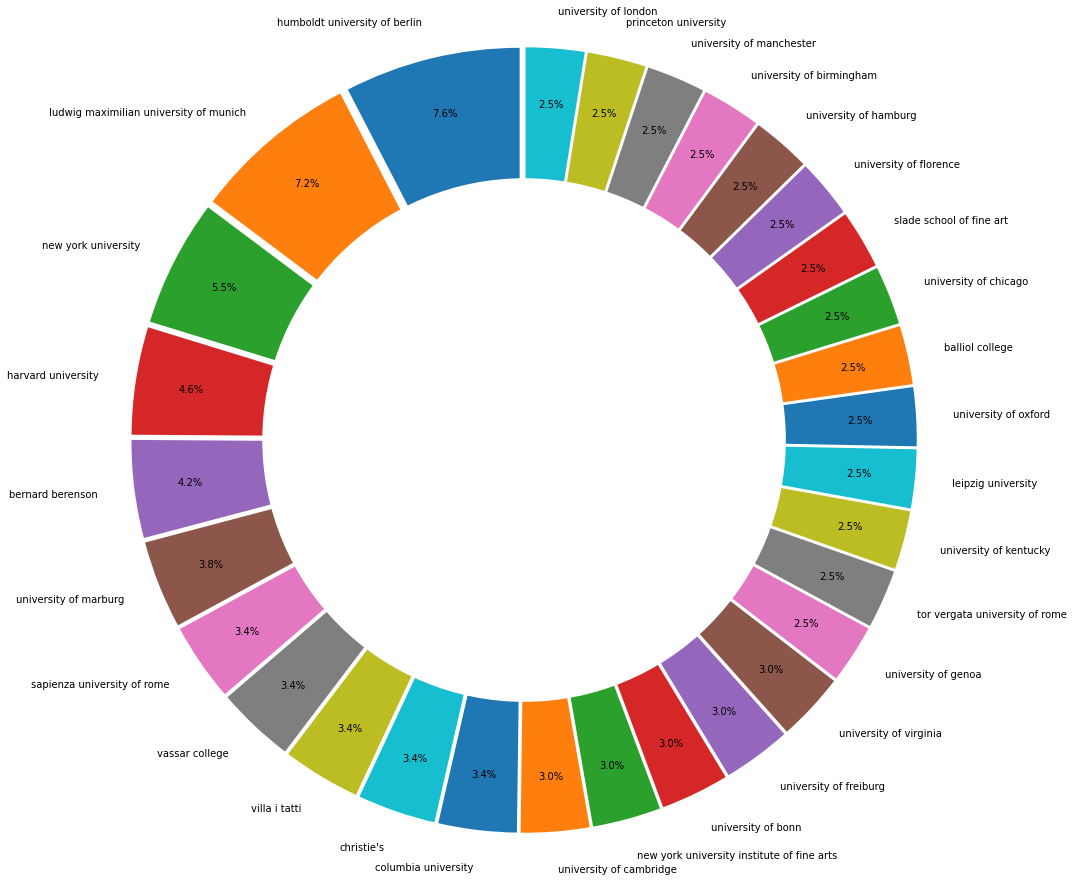

In [195]:
#Visualization of occurrences of universities (in percentage), according to data that we have in our database

l = len(oredered_university_dict0)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in oredered_university_dict0.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

In [196]:
#We created a table containing data of the most relevant universities , adding data related to their country and the people that have a relation with them

g = rdflib.ConjunctiveGraph()
result = g.parse("artchives_output.nq", format='nquads')

query_results7 = g.query(
    """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX xs: <http://www.w3.org/2001/XMLSchema#>
SELECT distinct ?s ?name ?uni ?uni_name ?uni ?country ?country_name
WHERE {
?s rdf:type wd:Q5;
rdfs:label ?name ;
?p ?uni.
FILTER (?p = wdt:P69 || ?p = wdt:P108 || ?p = wdt:P921).
?uni rdfs:label ?uni_name;
wdt:P17 ?country.
?country rdfs:label ?country_name.
}
""")


In [197]:
#Check of the data we extracted
query_set7=set()
for q in query_results7:
    query_set7.add(q)

for q in query_set7:
    print(q[1].lstrip(), "has a link with the university: ", q[3].lstrip(), "located in ", q[6].lstrip())


Leo Steinberg has a link with the university:  Slade School of Fine Art located in  United Kingdom
Ernst Kitzinger has a link with the university:  University of Cambridge located in  United Kingdom
Ellis Waterhouse has a link with the university:  Princeton University located in  United States of America
Otto Lehmann-Brockhaus has a link with the university:  Ludwig Maximilian University of Munich located in  Germany
Everett Fahy has a link with the university:  New York University located in  United States of America
Everett Fahy has a link with the university:  Villa I Tatti located in  Italy
Julian Kliemann has a link with the university:  Getty Research Institute located in  United States of America
Richard Krautheimer has a link with the university:  University of Marburg located in  Germany
Federico Zeri has a link with the university:  Harvard University located in  United States of America
Julian Kliemann has a link with the university:  Ludwig Maximilian University of Munich 

In [198]:
#Adding information related to 
for k,v in oredered_university_dict0.items():
    if len(v) >= 3:
        pass
    else:
        v.append(set())
        for q in query_set7:
            if k == q[2][31:]:
                v[2].add(q[1].lstrip())

for k,v in oredered_university_dict0.items():
    for q in query_set7:
        if k == q[2][31:]:
            if len(v)<4:
                v.append(q[6].lstrip())
    if len(v)<4:
        v.append("-")

print(oredered_university_dict0)
        

{'Q152087': ['humboldt university of berlin', 18, {'Werner Cohn', 'Leo Steinberg', 'Ulrich Middeldorf', 'Kurt Badt', 'Julian Kliemann', 'Richard Krautheimer', 'Aby Warburg'}, 'Germany'], 'Q55044': ['ludwig maximilian university of munich', 17, {'Richard Krautheimer', 'Ulrich Middeldorf', 'Kurt Badt', 'Julian Kliemann', 'Otto Lehmann-Brockhaus', 'Ernst Kitzinger', 'Aby Warburg'}, 'Germany'], 'Q49210': ['new york university', 13, {'Werner Cohn', 'Leo Steinberg', 'John Pope-Hennessy', 'Julius S. Held', 'Richard Krautheimer', 'Everett Fahy'}, 'United States of America'], 'Q13371': ['harvard university', 11, {'Ernst Kitzinger', 'Leo Steinberg', 'Federico Zeri', 'Everett Fahy'}, 'United States of America'], 'Q359047': ['bernard berenson', 10, set(), '-'], 'Q155354': ['university of marburg', 9, {'Otto Lehmann-Brockhaus', 'Richard Krautheimer'}, 'Germany'], 'Q209344': ['sapienza university of rome', 8, {'Adolfo Venturi', 'Federico Zeri'}, 'Italy'], 'Q2093794': ['vassar college', 8, {'Wolfgang

In [199]:
#VISUALIZZAZIONE DELLA TABELLA CON I DATI RELATIVI ALLE UNIVERSITà (se non va, provare altro file (evvivafunziono))
for k,v in oredered_university_dict0.items():
    v[2]=list(v[2])
    x = (" - ".join(v[2]))
    v[2] = x
    
print(oredered_university_dict0)
#check dei dati per compilare la tabella (set trasformato prima in lista poi in stringa, per essere inserito nella tabella)

code_list=[]
name_list=[]
occ_list=[]
peop_list=[]
count_list=[]

for k,v in oredered_university_dict0.items():
    code_list.append(k)
    name_list.append(v[0])
    occ_list.append(v[1])
    peop_list.append(v[2])
    count_list.append(v[3])

import plotly.graph_objects as go
import pandas as pd
from plotly.offline import iplot
import plotly.io as pio
import matplotlib.pyplot as plt




colors = ["rgba(232,162,172,255)","rgba(205,53,82,255)","rgba(58,73,194,255)","rgba(43,20,49,255)"]

def colors_multiplier (l1, l2):
    while len(l1) < len(l2):
        l1 = (l1)*2
    if len(l1) == len(l2):
        return l1
    else:
        while len(l1)> len(l2):
            l1.pop()
        return(l1)
        
colors2 = (colors_multiplier(colors, oredered_university_dict0))


data = {"Name": name_list, "Code": code_list, "Occurrences": occ_list, "People":peop_list, "Country": count_list, 'Color' : colors2}
df = pd.DataFrame(data)

fig = go.Figure(data=[go.Table(
  header=dict(
    values=["<b>Name</b>","<b>Code</b>", "<b>Occurrences</b>", "<b>People</b>", "<b>Country</b>"],
    line_color='white', fill_color='white',
    align='center', font=dict(color='black', size=12)
  ),
  cells=dict(
    values=[df.Name, df.Code, df.Occurrences, df.People, df.Country],
    line_color=[df.Color], fill_color=[df.Color],
    align='center', font=dict(color='white', size=11)
  ))
])

#iplot(fig)
fig.show()
#se non esce vedere altro file

{'Q152087': ['humboldt university of berlin', 18, 'Werner Cohn - Leo Steinberg - Ulrich Middeldorf - Kurt Badt - Julian Kliemann - Richard Krautheimer - Aby Warburg', 'Germany'], 'Q55044': ['ludwig maximilian university of munich', 17, 'Richard Krautheimer - Ulrich Middeldorf - Kurt Badt - Julian Kliemann - Otto Lehmann-Brockhaus - Ernst Kitzinger - Aby Warburg', 'Germany'], 'Q49210': ['new york university', 13, 'Werner Cohn - Leo Steinberg - John Pope-Hennessy - Julius S. Held - Richard Krautheimer - Everett Fahy', 'United States of America'], 'Q13371': ['harvard university', 11, 'Ernst Kitzinger - Leo Steinberg - Federico Zeri - Everett Fahy', 'United States of America'], 'Q359047': ['bernard berenson', 10, '', '-'], 'Q155354': ['university of marburg', 9, 'Otto Lehmann-Brockhaus - Richard Krautheimer', 'Germany'], 'Q209344': ['sapienza university of rome', 8, 'Adolfo Venturi - Federico Zeri', 'Italy'], 'Q2093794': ['vassar college', 8, 'Wolfgang Lotz - Richard Krautheimer', 'United 

In [200]:
#ATTENZIONE: LEGGERE BENE (PERCORSO ALTERNATIVO, DA RIVALUTARE DOPO AVER RUNNATO FILE INPUT DEFINITIVO)
#DO WE WANT TO KEEP IT? questa è una versione alternativa per contare le occorrenze delle università.
#scarta direttamente quelle che non sono identificate come università anche se contengono la parola università. il conteggio è SIMILE, ma fallato rispetto a quello che avevamo fatto 
#We counted the number of occurrences for university with COUNT in sparql, but this didn't allow us to consider all the 
#universities that are not registered as universities of studies or as universities where someone worked (p69 / p108), i.e. 
#the universities with whom people have a generic link
query_results5 = g.query(
    """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX xs: <http://www.w3.org/2001/XMLSchema#>
SELECT DISTINCT ?uni (count(distinct ?person) as ?count) ?uni_name
WHERE {
    ?uni rdfs:label ?uni_name.
    ?person ?p ?uni.
    FILTER (?p = wdt:P69 || ?p = wdt:P108).
}

GROUP BY ?count ?uni ?uni_name
ORDER BY ?count ?uni_name
""")

#dizionari parziali: università con cui si ha collegamento non specificato
query_results3 = g.query(
    """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX xs: <http://www.w3.org/2001/XMLSchema#>
SELECT ?uni (count(distinct ?person) as ?count) ?uni_name
WHERE {
    ?uni rdfs:label ?uni_name.
    ?person wdt:P921 ?uni.
}

GROUP BY ?count ?uni ?uni_name
ORDER BY ?count ?uni_name
""")
#second count dict, another attempt to count university occurrences without scraping the original file line by line
query_set0 = set()
for query_res in query_results5:
    query_set0.add(query_res)
    
nw_count_dict={}
for q in query_set0:
    x = (str(q[0]))[31:]
    nw_count_dict[x] = []
    nw_count_dict[x].append(q[2].lstrip().lower())
    nw_count_dict[x].append(int(q[1]))
#update with the value of the count for P921

query_set1 = set()
for query_res in query_results3:
    query_set1.add(query_res)
    
for q in query_set1:
    for k,v in nw_count_dict.items():
        if k in q[0]:
            n = int(q[1])
            v[1] = v[1] + n
    
from collections import OrderedDict
nw_count_dict_ord = dict(sorted(nw_count_dict.items(), key=lambda item: (item[1])[1], reverse=True))

print(nw_count_dict_ord)


{'Q152087': ['humboldt university of berlin', 8], 'Q55044': ['ludwig maximilian university of munich', 8], 'Q49210': ['new york university', 8], 'Q359047': ['bernard berenson', 6], 'Q13371': ['harvard university', 6], 'Q3558578': ['villa i tatti', 4], 'Q153987': ['university of freiburg', 3], 'Q49088': ['columbia university', 3], 'Q152171': ['university of bonn', 2], 'Q503176': ["christie's", 2], 'Q167733': ['barnard college', 2], 'Q1399299': ['slade school of fine art', 2], 'Q2093794': ['vassar college', 2], 'Q3339070': ['new york university institute of fine arts', 2], 'Q131252': ['university of chicago', 2], 'Q155354': ['university of marburg', 2], 'Q35794': ['university of cambridge', 2], 'Q154804': ['leipzig university', 2], 'Q213439': ['university of virginia', 2], 'Q209344': ['sapienza university of rome', 2], 'Q81162': ['magdalen college', 1], 'Q593321': ['university of genoa', 1], 'Q230899': ['university of manchester', 1], 'Q49117': ['university of pennsylvania', 1], 'Q156725

(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:41: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



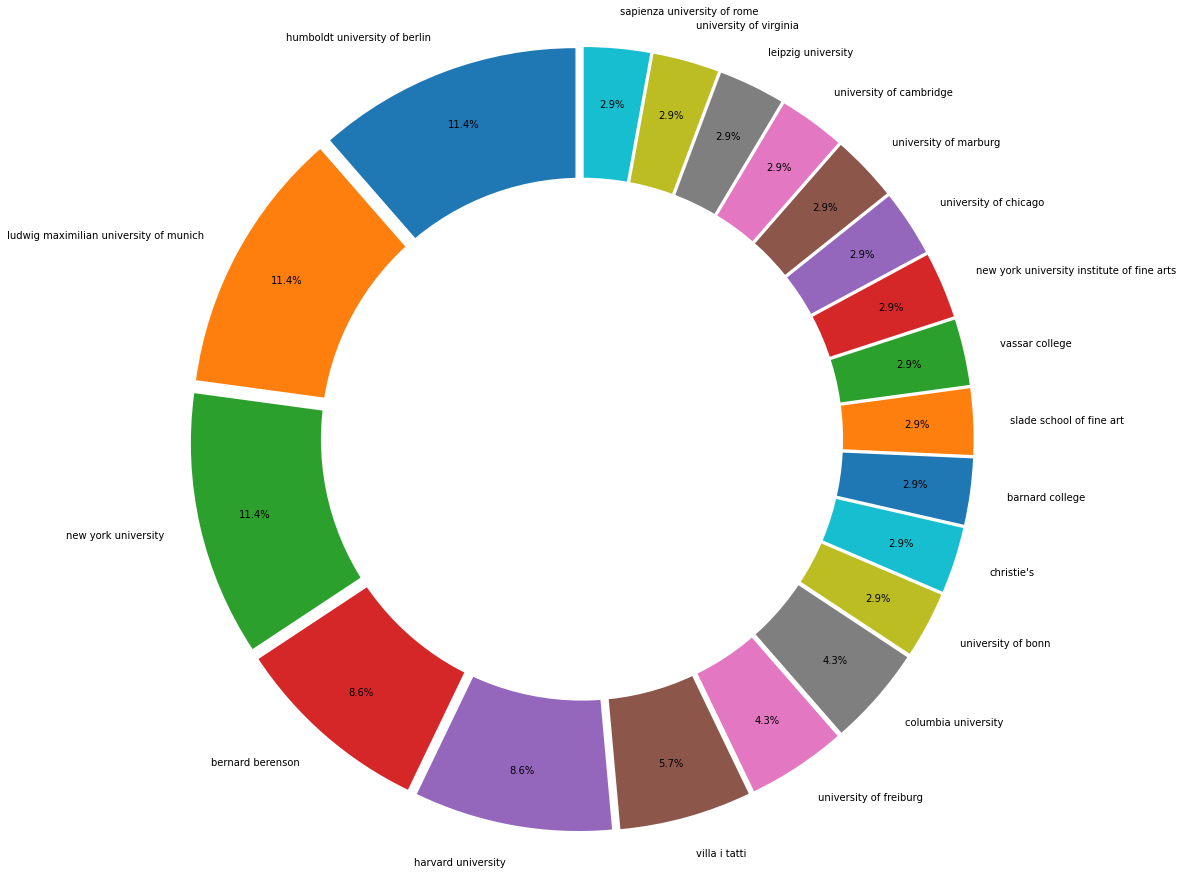

In [201]:
#Visualization of occurrences of universities (in percentage), according to data that we have in our database

to_be_deleted=[]
for k,v in nw_count_dict_ord.items():
    if v[1] <= 1:
        to_be_deleted.append(k)
for i in to_be_deleted:
    del nw_count_dict_ord[i]

l = len(nw_count_dict_ord)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in nw_count_dict_ord.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

In [81]:
"""
STEP 1: PERSONE COLLEGATE ALL'UNIVERSITA'
QUERIES:
GRAFICI E VISUALIZZAZIONI: tabella e gant
FILES UTILIZZATI:

"""


"\nSTEP 1: PERSONE COLLEGATE ALL'UNIVERSITA'\nQUERIES:\nGRAFICI E VISUALIZZAZIONI: tabella e gant\nFILES UTILIZZATI:\n\n"

In [202]:
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
from six import string_types

 

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")
xs = Namespace("http://www.w3.org/2001/XMLSchema#")

 

# create an empty Graph
g = rdflib.ConjunctiveGraph()

 

# parse a local RDF file by specifying the format
result = g.parse("artchives_output.nq", format='nquads')

In [203]:
#NOME - CODICE - NASCITA POSTO - NASCITA DATA - DATA DI MORTE 
query_results= g.query(
"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
SELECT ?person ?name ?birth_date ?death_date ?citiz_name
WHERE {
?person rdf:type wd:Q5 ;
rdfs:label ?name ;
wdt:P921 wd:Q152087;
wdt:P569 ?birth_date;
wdt:P570 ?death_date;
wdt:P27 ?citiz .
?citiz rdfs:label ?citiz_name
}
 
""")

In [204]:
biodict={}
for query in query_results:
    biodict[str(query[0])[31:]] = [str(query[1]).lstrip(), str(query[2]).lstrip()[:4], str(query[3]).lstrip()[:4], str(query[4]).lstrip(), [], []]

print(biodict)

{'Q90407': ['Richard Krautheimer', '1897', '1994', 'Germany', [], []], 'Q457739': ['Leo Steinberg', '1920', '2011', 'Russia', [], []], 'Q60185': ['Aby Warburg', '1866', '1929', 'Germany', [], []], 'Q1715096': ['Ulrich Middeldorf', '1901', '1983', 'Germany', [], []], 'Q18935222': ['Werner Cohn', '1905', '1960', 'Germany', [], []], 'Q1629748': ['Kurt Badt', '1890', '1973', 'Germany', [], []], 'Q85761254': ['Julian Kliemann', '1949', '2015', 'Germany', [], []]}


In [205]:
#Worked as: #has collections

query_results6= g.query(
"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX art: <https://w3id.org/artchives/>
SELECT ?person ?coll_name ?name_occup ?collection
WHERE {
?person rdf:type wd:Q5 ;
rdfs:label ?name ;
wdt:P921 wd:Q152087.
?collection wdt:P170 ?person;
rdfs:label ?coll_name.
?person wdt:P106 ?occup.
?occup rdfs:label ?name_occup.
}

""")


In [206]:
for query in query_results6:
    print(query[0].lstrip()[31:], "-", query[1],"-", query[2].lstrip().lower(), q[3][31:])

IndexError: tuple index out of range

In [207]:
for k,v in biodict.items():
    v[5] = set(v[5])
    v[4] = set(v[4])

for query in query_results6:
    for k,v in biodict.items():
        if query[0].lstrip()[31:] in k:
            (v[4]).add(str(query[2].lstrip().lower()))
            print(v[4])
            #v[4].append[query[2].lstrip().lower()]
            
for query in query_results6:
    for k,v in biodict.items():
        if query[0].lstrip()[31:] in k:
            (v[5]).add(str(query[1].lstrip().lower()))
            print(v[4])

{'art collector'}
{'professor'}
{'critic', 'professor'}
{'art historian', 'critic', 'professor'}
{'art historian'}
{'director'}
{'art historian', 'director'}
{'art historian', 'director'}
{'art historian', 'director', 'professor'}
{'art historian', 'director', 'professor'}
{'art historian', 'director', 'professor'}
{'art historian', 'director', 'professor'}
{'art historian', 'director', 'professor'}
{'art historian'}
{'bookseller', 'art historian'}
{'independent scholar'}
{'independent scholar', 'art historian'}
{'university teacher'}
{'art collector'}
{'art collector'}
{'art historian', 'critic', 'professor'}
{'art historian', 'critic', 'professor'}
{'art historian', 'critic', 'professor'}
{'art historian'}
{'art historian', 'director', 'professor'}
{'art historian', 'director', 'professor'}
{'art historian', 'director', 'professor'}
{'art historian', 'director', 'professor'}
{'art historian', 'director', 'professor'}
{'art historian', 'director', 'professor'}
{'art historian', 'direc

In [209]:
for k,v in biodict.items():
    v[4]=list(v[4])
    x = (" - ".join(v[4]))
    v[4] = x
    v[5]=list(v[5])
    y = (" - ".join(v[5]))
    v[5] = y

print()

code_list=[]
name_list=[]
birth_list=[]
death_list=[]
citiz_list=[]
jobset_list=[]
collectionset_list=[]

occurrences_list=[]
for k,v in biodict.items():
    code_list.append(k)
    name_list.append(v[0])
    birth_list.append(v[1])
    death_list.append(v[2])
    citiz_list.append(v[3])
    jobset_list.append(v[4])
    collectionset_list.append(v[5])
    
import plotly.graph_objects as go

import pandas as pd

colors = ["rgba(232,162,172,255)","rgba(205,53,82,255)","rgba(58,73,194,255)","rgba(43,20,49,255)"]

def colors_multiplier (l1, l2):
    while len(l1) < len(l2):
        l1 = (l1)*2
    if len(l1) == len(l2):
        return l1
    else:
        while len(l1)> len(l2):
            l1.pop()
        return(l1)
        
colors2 = (colors_multiplier(colors, biodict))

data = {'Name' : name_list, "Code": code_list, "Birth": birth_list, "Death":death_list, "Citizenship": citiz_list, "Roles": jobset_list, "Collections": collectionset_list, 'Color' : colors2}
df = pd.DataFrame(data)

fig = go.Figure(data=[go.Table(
  header=dict(
    values=["<b>Name</b>","<b>Code</b>", "<b>Birth</b>", "<b>Death</b>", "<b>Citizenship</b>", "<b>Roles</b>", "<b>Collections</b>"],
    line_color='white', fill_color='white',
    align='center', font=dict(color='black', size=12)
  ),
  cells=dict(
    values=[df.Name, df.Code, df.Birth, df.Death, df.Citizenship, df.Roles, df.Collections],
    line_color=[df.Color], fill_color=[df.Color],
    align='center', font=dict(color='white', size=11)
  ))
])

fig.show()

In [210]:
#bio: BS per estrarre pezzi di informazione da artchives

import requests
from bs4 import BeautifulSoup
import re


def histo_bio (code):
    ur = "http://artchives.fondazionezeri.unibo.it/historian-"
    url = ur+code
    response = requests.get(url)
    #print(response.status_code)
    soup = BeautifulSoup(response.content)
    secTag = soup.find_all("section", {"class": "columns"})
    my_text=[]
    for tag in secTag:
        pTags = tag.find_all("p")
        for tag in pTags:
            my_text.append(tag.text)
    my_text= " ".join(my_text)
    phrases_list = re.findall("[A-Z].*?[\.!?]", my_text, re.MULTILINE | re.DOTALL )
    #return phrases_list
    l = len(phrases_list)
    first = phrases_list[0]
    last = phrases_list[l-1]
    to_be_returned=[]
    to_be_returned.append(first)
    for i in phrases_list:
        if "University" in i or "Universities" in i or "university" in i or "studied" in i:
            if i != first:
                to_be_returned.append(i)
    if last not in to_be_returned and "Died" in last or "died" in last or "buried" in last:
        to_be_returned.append(last)
    to_html=[]
    for i in to_be_returned:
        to_html.append("<p>" + i +"</p>")
    to_html = " ".join(to_html)
    return to_html


text1 = '''
<html>
    <body>
'''

text2 = '''
    </body>
</html>

'''


for k, v in biodict.items():
    file = open(k + ".html","w")
    file.write(text1 + histo_bio(k) + text2)
    file.close()

In [90]:
"""
STEP 2: SOVRAPPOSIZIONI PERIODI DI ATTIVITà 
QUERIES:
GRAFICI E VISUALIZZAZIONI:
FILES UTILIZZATI:

"""


'\nSTEP 2: SOVRAPPOSIZIONI PERIODI DI ATTIVITà \nQUERIES:\nGRAFICI E VISUALIZZAZIONI:\nFILES UTILIZZATI:\n\n'

In [211]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot

var1="Start"
count1=0
var_name_list=[]
for k,v in biodict.items():
    count1+=1
    varx=var1+str(count1)
    var_name_list.append(varx)

var2="Finish"
count2=0
var_name_list2=[]
for k,v in biodict.items():
    count2+=1
    vary=var2+str(count2)
    var_name_list2.append(vary)

var3="LabelDate"
count3=0
var_name_list3=[]
for k,v in biodict.items():
    count3+=1
    varz=var3+str(count3)
    var_name_list3.append(varz)

or_biodict= (sorted(biodict.items(), key=lambda item: item[1]))

# Bdates
count = 0
for c, v in enumerate(var_name_list):
    globals()[v] = int(or_biodict[c][1][1])
    count += 1

# Ddates
count = 0
for c, v in enumerate(var_name_list2):
    globals()[v] = int(or_biodict[c][1][2])
    count += 1


#
count = 0
for c, v in enumerate(var_name_list3):
    globals()[v] = (or_biodict[c][1][0])
    count += 1

df=[]


for c,v in enumerate(or_biodict):
    data_dict=dict()
    for c2, v2 in enumerate(var_name_list):
        if c2 == c:
            globals()[v2] = int(or_biodict[c][1][1])
            data_dict["Start"]=globals()[v2]
    for c1, v1 in enumerate(var_name_list2):
        if c1 == c:
            globals()[v1] = int(or_biodict[c][1][2])
            data_dict["Finish"]=globals()[v1]
    for c3, v3 in enumerate(var_name_list3):
        if c3 == c:
            globals()[v3] = (or_biodict[c][1][0])
            data_dict["Task"]=globals()[v3]
    df.append(data_dict)


# figure
fig = ff.create_gantt(df)
iplot(fig)


In [92]:
"""
STEP 3: Collezioni e TEMATICHE DI RICERCA: linea del tempo dei periodi (per vedere quali si sovrappongono)
QUERIES:
GRAFICI E VISUALIZZAZIONI: linea del tempo dei periodi (per vedere quali si sovrappongono), Eulero venn per vedere come si sovrappongono tra loro nella distribuzione delle tematiche di ricerca
FILES UTILIZZATI:

"""


'\nSTEP 3: Collezioni e TEMATICHE DI RICERCA: linea del tempo dei periodi (per vedere quali si sovrappongono)\nQUERIES:\nGRAFICI E VISUALIZZAZIONI: linea del tempo dei periodi (per vedere quali si sovrappongono), Eulero venn per vedere come si sovrappongono tra loro nella distribuzione delle tematiche di ricerca\nFILES UTILIZZATI:\n\n'

In [212]:
query_results_period= g.query(
"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX art: <https://w3id.org/artchives/>
SELECT  ?period ?period_name ?start_time ?end_time ?person
WHERE {

?collection wdt:P170 ?person;
rdfs:label ?coll_name.
?collection art:hasSubjectPeriod ?period.
?period rdfs:label ?period_name;
wdt:P580 ?start_time;
wdt:P582 ?end_time.

}

""")

 
period_dict=dict()
for query in query_results_period:
    period_dict[str(query[0]).lstrip()]= [str(query[1]).lstrip().lower(), query[2], query[3]]
    
print(period_dict)

{'http://www.wikidata.org/entity/Q12554': ['middle ages', rdflib.term.Literal('0476-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime')), rdflib.term.Literal('1500-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime'))], 'http://www.wikidata.org/entity/Q7018': ['15th century', rdflib.term.Literal('1401-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime')), rdflib.term.Literal('1500-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime'))], 'http://www.wikidata.org/entity/Q4692': ['renaissance', rdflib.term.Literal('1400-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime')), rdflib.term.Literal('1650-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime'))], 'http://www.wikidata.org/entity/Q7015': ['18th century', rdflib.term.Literal('1700

In [213]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot

var1="Start"
count1=0
var_name_list=[]
for k,v in period_dict.items():
    count1+=1
    varx=var1+str(count1)
    var_name_list.append(varx)


var2="Finish"
count2=0
var_name_list2=[]
for k,v in period_dict.items():
    count2+=1
    vary=var2+str(count2)
    var_name_list2.append(vary)

var3="LabelDate"
count3=0
var_name_list3=[]
for k,v in period_dict.items():
    count3+=1
    varz=var3+str(count3)
    var_name_list3.append(varz)


or_period_dict= (sorted(period_dict.items(), key=lambda item: item[1]))

count = 0
for c, v in enumerate(var_name_list):
    globals()[v] = or_period_dict[c][1][1]
    count += 1


# Ddates
count = 0
for c, v in enumerate(var_name_list2):
    globals()[v] = or_period_dict[c][1][2]
    count += 1
#
count = 0
for c, v in enumerate(var_name_list3):
    globals()[v] = (or_period_dict[c][1][0])
    count += 1


df=[]


for c,v in enumerate(or_period_dict):
    data_dict=dict()
    for c2, v2 in enumerate(var_name_list):
        if c2 == c:
            globals()[v2] = or_period_dict[c][1][1]
            data_dict["Start"]=globals()[v2]
    for c1, v1 in enumerate(var_name_list2):
        if c1 == c:
            globals()[v1] = or_period_dict[c][1][2]
            data_dict["Finish"]=globals()[v1]
    for c3, v3 in enumerate(var_name_list3):
        if c3 == c:
            globals()[v3] = (or_period_dict[c][1][0])
            data_dict["Task"]=globals()[v3]
    df.append(data_dict)

# figure
fig = ff.create_gantt(df)
iplot(fig)

In [214]:
print(biodict)
#?period ?period_name ?start_time ?end_time ?person
for k,v in biodict.items():
    v.append(set())
    for q in query_results_period:
        if q[4][31:] in k:
            v[6].add(q[1].lstrip().lower())

    

{'Q90407': ['Richard Krautheimer', '1897', '1994', 'Germany', 'a - r - t -   - c - o - l - l - e - c - t - o - r', 'n - a - c - h - l - a - s - s -   - r - i - c - h - a - r - d -   - k - r - a - u - t - h - e - i - m - e - r'], 'Q457739': ['Leo Steinberg', '1920', '2011', 'Russia', 'a - r - t -   - h - i - s - t - o - r - i - a - n -   - - -   - c - r - i - t - i - c -   - - -   - p - r - o - f - e - s - s - o - r', 'l - e - o -   - s - t - e - i - n - b - e - r - g -   - r - e - s - e - a - r - c - h -   - p - a - p - e - r - s'], 'Q60185': ['Aby Warburg', '1866', '1929', 'Germany', 'a - r - t -   - h - i - s - t - o - r - i - a - n', 'f - o - n - d - o -   - a - b - y -   - w - a - r - b - u - r - g'], 'Q1715096': ['Ulrich Middeldorf', '1901', '1983', 'Germany', 'a - r - t -   - h - i - s - t - o - r - i - a - n -   - - -   - d - i - r - e - c - t - o - r -   - - -   - p - r - o - f - e - s - s - o - r', 'u - l - r - i - c - h -   - m - i - d - d - l - e - d - o - r - f -   - p - a 

In [215]:
query_results_period= g.query(
"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX art: <https://w3id.org/artchives/>
SELECT  ?period ?period_name ?start_time ?end_time ?person ?coll_name ?collection
WHERE {

?collection wdt:P170 ?person;
rdfs:label ?coll_name.
?collection art:hasSubjectPeriod ?period.
?period rdfs:label ?period_name;
wdt:P580 ?start_time;
wdt:P582 ?end_time.

}

""")

 
period_dict=dict()
for query in query_results_period:
    period_dict[str(query[0]).lstrip()]= [str(query[1]).lstrip().lower(), query[2], query[3]]
    
print(period_dict)

{'http://www.wikidata.org/entity/Q12554': ['middle ages', rdflib.term.Literal('0476-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime')), rdflib.term.Literal('1500-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime'))], 'http://www.wikidata.org/entity/Q7018': ['15th century', rdflib.term.Literal('1401-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime')), rdflib.term.Literal('1500-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime'))], 'http://www.wikidata.org/entity/Q4692': ['renaissance', rdflib.term.Literal('1400-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime')), rdflib.term.Literal('1650-01-01T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime'))], 'http://www.wikidata.org/entity/Q7015': ['18th century', rdflib.term.Literal('1700

In [97]:
#ho bisogno di un dizionario, con chiave persona, nome persona, { collezione : periodi associati }

#query_results_period
#?period ?period_name ?start_time ?end_time ?person ?coll_name

themes_dict= dict()

for k,v in biodict.items():
    themes_dict[k] = [v[0], {}]

#print(themes_dict)
    
for q in query_results_period:
    for k,v in themes_dict.items():
        if q[4][31:] == k:
            if (q[5].lstrip().lower()) not in (v[1]):
                (v[1])[(q[5].lstrip().lower())] = []
                (v[1])[(q[5].lstrip().lower())].append(q[1].lstrip().lower())
            else:
                (v[1])[(q[5].lstrip().lower())].append(q[1].lstrip().lower())
                
print(themes_dict)


{'Q60185': ['Aby Warburg', {'fondo aby warburg': ['renaissance']}], 'Q457739': ['Leo Steinberg', {'leo steinberg research papers': ['renaissance']}], 'Q90407': ['Richard Krautheimer', {'nachlass richard krautheimer': ['renaissance', 'baroque']}], 'Q18935222': ['Werner Cohn', {'nachlass werner cohn': ['middle ages', 'renaissance']}], 'Q1629748': ['Kurt Badt', {'nachlass kurt badt': ['middle ages', 'baroque', '16th century']}], 'Q85761254': ['Julian Kliemann', {'fototeca julian kliemann': ['16th century', 'baroque', '15th century', '17th century', 'renaissance']}], 'Q1715096': ['Ulrich Middeldorf', {'ulrich middledorf papers': ['renaissance'], 'nachlass ulrich middeldorf': ['cold war']}]}


In [98]:

global_occurrences = dict()

for k,v in themes_dict.items():
    global_occurrences[v[0]] = {}
    for j, y in v[1].items():
        for i in y:
            if i not in global_occurrences[v[0]]:
                global_occurrences[v[0]][i] = 1
            else:
                global_occurrences[v[0]][i] += 1
                
    
print(global_occurrences)

{'Aby Warburg': {'renaissance': 1}, 'Leo Steinberg': {'renaissance': 1}, 'Richard Krautheimer': {'renaissance': 1, 'baroque': 1}, 'Werner Cohn': {'middle ages': 1, 'renaissance': 1}, 'Kurt Badt': {'middle ages': 1, 'baroque': 1, '16th century': 1}, 'Julian Kliemann': {'16th century': 1, 'baroque': 1, '15th century': 1, '17th century': 1, 'renaissance': 1}, 'Ulrich Middeldorf': {'renaissance': 1, 'cold war': 1}}


this is key global occurrences {'Q90407': ['Richard Krautheimer', {'baroque': 1, 'renaissance': 1}], 'Q457739': ['Leo Steinberg', {'renaissance': 1}], 'Q1715096': ['Ulrich Middeldorf', {'cold war': 1, 'renaissance': 1}], 'Q18935222': ['Werner Cohn', {'middle ages': 1, 'renaissance': 1}], 'Q1629748': ['Kurt Badt', {'middle ages': 1, '16th century': 1, 'baroque': 1}], 'Q60185': ['Aby Warburg', {'renaissance': 1}], 'Q85761254': ['Julian Kliemann', {'15th century': 1, '16th century': 1, 'baroque': 1, '17th century': 1, 'renaissance': 1}]}
{'Richard Krautheimer': [0, 0, 0, 1, 0, 0, 1], 'Leo Steinberg': [0, 0, 0, 1, 0, 0, 0], 'Ulrich Middeldorf': [0, 0, 1, 1, 0, 0, 0], 'Werner Cohn': [0, 0, 0, 1, 1, 0, 0], 'Kurt Badt': [0, 0, 0, 0, 1, 1, 1], 'Aby Warburg': [0, 0, 0, 1, 0, 0, 0], 'Julian Kliemann': [1, 1, 0, 1, 0, 1, 1]}


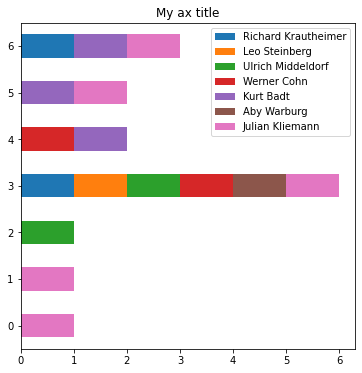

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
key_set = set()
key_global_occurrences = {}
for k,v in themes_dict.items():
    for x, y in global_occurrences.items():
        if v[0] == x:
            key_global_occurrences[k] = []
            key_global_occurrences[k].append(x)
            key_global_occurrences[k].append(y)

        
print("this is key global occurrences", key_global_occurrences)        
for k, v in global_occurrences.items():
    for j, y in v.items():
        key_set.add(j)

key_list = list(key_set)
dict_for_pd = {}

for k, v in key_global_occurrences.items():
    p = k
    p = []
    for i in key_list:
        count = 0
        if i in v[1]:
            count += v[1][i]
        p.append(count)
        dict_for_pd[v[0]] = p
print(dict_for_pd)


df = pd.DataFrame(dict_for_pd)
ax = df.plot.barh(stacked=True);

 

ax.figure.set_size_inches(6,6)

 

ax.set_title("My ax title")
ax.legend(loc='upper right')

In [100]:
total_occurrences = {}

for k, v in global_occurrences.items():
    for j, y in v.items():
        if j not in total_occurrences:
            total_occurrences[j] = y
        else:
            total_occurrences[j] += y
print(total_occurrences)

{'baroque': 3, 'renaissance': 6, 'cold war': 1, 'middle ages': 2, '16th century': 2, '15th century': 1, '17th century': 1}


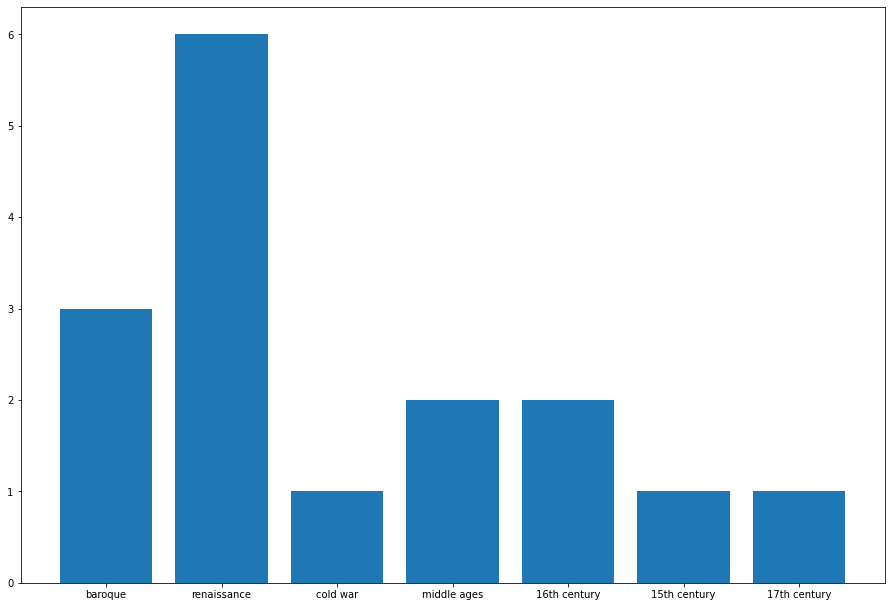

In [101]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])

object_periods = []
collections = []

for k,v in total_occurrences.items():
    object_periods.append(k)
    collections.append(v)

ax.bar(object_periods,collections)
plt.show()

In [102]:
"""
STEP 4: COLLEGAMENTI TRA PERSONE
QUERIES:
GRAFICI E VISUALIZZAZIONI:
FILES UTILIZZATI:

"""






'\nSTEP 4: COLLEGAMENTI TRA PERSONE\nQUERIES:\nGRAFICI E VISUALIZZAZIONI:\nFILES UTILIZZATI:\n\n'

In [216]:
from chord import Chord
matrix = []
names = []
for k,v in key_global_occurrences.items():
    names.append(v[0])
    l = []
    for y,x in key_global_occurrences.items():
        if k == y:
            l.append(0)
        else:
            count = 0
            for n in v[1]:
                if n in x[1]:
                    count +=1
            l.append(count)
    matrix.append(l)

print(matrix)
print(names)

Chord(matrix, names).show()


[[0, 1, 1, 1, 1, 1, 2], [1, 0, 1, 1, 0, 1, 1], [1, 1, 0, 1, 0, 1, 1], [1, 1, 1, 0, 1, 1, 1], [1, 0, 0, 1, 0, 0, 2], [1, 1, 1, 1, 0, 0, 1], [2, 1, 1, 1, 2, 1, 0]]
['Richard Krautheimer', 'Leo Steinberg', 'Ulrich Middeldorf', 'Werner Cohn', 'Kurt Badt', 'Aby Warburg', 'Julian Kliemann']


In [104]:
plot = Chord(matrix, names).to_html()

from IPython.display import IFrame
IFrame(src="./out.html", width=700, height=700)

In [217]:
# Import packages for data cleaning
import numpy as np
import pandas as pd
import re # For finding specific strings in the text
# Import packages for data visualization
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx

#print(key_global_occurrences)
# Create the empty data structure using custom function
cointerest_counts ={}
# Show a part of the data structure
# Dictionary of dictionaries where each key is each character and each value is a dictionary with all other characters as keys, and values as 0 or [].
for k,v in key_global_occurrences.items():
    cointerest_counts[v[0]] = {}
    for y,x in key_global_occurrences.items():
        if k != y: ####
            count = 0
            for i in key_list:
                if i in v[1].keys() and i in x[1].keys():
                    count +=1
            cointerest_counts[v[0]][x[0]] = count
print(cointerest_counts)

interest_counts = {}
for k,v in key_global_occurrences.items():
    count = 0 
    for i in key_list:
        if i in v[1]:
            count += 1
    interest_counts[v[0]]= count
    
print(interest_counts)



{'Richard Krautheimer': {'Leo Steinberg': 1, 'Ulrich Middeldorf': 1, 'Werner Cohn': 1, 'Kurt Badt': 1, 'Aby Warburg': 1, 'Julian Kliemann': 2}, 'Leo Steinberg': {'Richard Krautheimer': 1, 'Ulrich Middeldorf': 1, 'Werner Cohn': 1, 'Kurt Badt': 0, 'Aby Warburg': 1, 'Julian Kliemann': 1}, 'Ulrich Middeldorf': {'Richard Krautheimer': 1, 'Leo Steinberg': 1, 'Werner Cohn': 1, 'Kurt Badt': 0, 'Aby Warburg': 1, 'Julian Kliemann': 1}, 'Werner Cohn': {'Richard Krautheimer': 1, 'Leo Steinberg': 1, 'Ulrich Middeldorf': 1, 'Kurt Badt': 1, 'Aby Warburg': 1, 'Julian Kliemann': 1}, 'Kurt Badt': {'Richard Krautheimer': 1, 'Leo Steinberg': 0, 'Ulrich Middeldorf': 0, 'Werner Cohn': 1, 'Aby Warburg': 0, 'Julian Kliemann': 2}, 'Aby Warburg': {'Richard Krautheimer': 1, 'Leo Steinberg': 1, 'Ulrich Middeldorf': 1, 'Werner Cohn': 1, 'Kurt Badt': 0, 'Julian Kliemann': 1}, 'Julian Kliemann': {'Richard Krautheimer': 2, 'Leo Steinberg': 1, 'Ulrich Middeldorf': 1, 'Werner Cohn': 1, 'Kurt Badt': 2, 'Aby Warburg': 1}

In [106]:
import networkx as nx
unilink = nx.Graph()
# Add node for each character
for hist in interest_counts.keys():
    if interest_counts[hist] > 0:
        unilink.add_node(hist, size = interest_counts[hist])
# For each co-appearance between two characters, add an edge
for hist in cointerest_counts.keys():
    for co_hist in cointerest_counts[hist].keys():
        
        # Only add edge if the count is positive
        if cointerest_counts[hist][co_hist] > 0:
            unilink.add_edge(hist, co_hist, weight = cointerest_counts[hist][co_hist])

In [107]:
pos_ = nx.spring_layout(unilink)

In [218]:
resultEdges = []
resultNodes = []

for edge in unilink.edges():
    resultEdges.append(edge)

for node in unilink.nodes():
    resultNodes.append(node)

print(resultEdges)
print(resultNodes)

G=nx.DiGraph()

G.add_nodes_from(resultNodes)
G.add_edges_from(resultEdges)


[('Richard Krautheimer', 'Leo Steinberg'), ('Richard Krautheimer', 'Ulrich Middeldorf'), ('Richard Krautheimer', 'Werner Cohn'), ('Richard Krautheimer', 'Kurt Badt'), ('Richard Krautheimer', 'Aby Warburg'), ('Richard Krautheimer', 'Julian Kliemann'), ('Leo Steinberg', 'Ulrich Middeldorf'), ('Leo Steinberg', 'Werner Cohn'), ('Leo Steinberg', 'Aby Warburg'), ('Leo Steinberg', 'Julian Kliemann'), ('Ulrich Middeldorf', 'Werner Cohn'), ('Ulrich Middeldorf', 'Aby Warburg'), ('Ulrich Middeldorf', 'Julian Kliemann'), ('Werner Cohn', 'Kurt Badt'), ('Werner Cohn', 'Aby Warburg'), ('Werner Cohn', 'Julian Kliemann'), ('Kurt Badt', 'Julian Kliemann'), ('Aby Warburg', 'Julian Kliemann')]
['Richard Krautheimer', 'Leo Steinberg', 'Ulrich Middeldorf', 'Werner Cohn', 'Kurt Badt', 'Aby Warburg', 'Julian Kliemann']


In [220]:
#print(key_global_occurrences)
# Create the empty data structure using custom function
cointerest_counts ={}
# Show a part of the data structure
# Dictionary of dictionaries where each key is each character and each value is a dictionary with all other characters as keys, and values as 0 or [].
for k,v in key_global_occurrences.items():
    cointerest_counts[v[0]] = {}
    for y,x in key_global_occurrences.items():
        if k != y: ####
            count = 0
            for i in key_list:
                if i in v[1].keys() and i in x[1].keys():
                    count +=1
            cointerest_counts[v[0]][x[0]] = count
print(cointerest_counts)

interest_counts = {}
for k,v in key_global_occurrences.items():
    count = 0 
    for i in key_list:
        if i in v[1]:
            count += 1
    interest_counts[v[0]]= count

{'Richard Krautheimer': {'Leo Steinberg': 1, 'Ulrich Middeldorf': 1, 'Werner Cohn': 1, 'Kurt Badt': 1, 'Aby Warburg': 1, 'Julian Kliemann': 2}, 'Leo Steinberg': {'Richard Krautheimer': 1, 'Ulrich Middeldorf': 1, 'Werner Cohn': 1, 'Kurt Badt': 0, 'Aby Warburg': 1, 'Julian Kliemann': 1}, 'Ulrich Middeldorf': {'Richard Krautheimer': 1, 'Leo Steinberg': 1, 'Werner Cohn': 1, 'Kurt Badt': 0, 'Aby Warburg': 1, 'Julian Kliemann': 1}, 'Werner Cohn': {'Richard Krautheimer': 1, 'Leo Steinberg': 1, 'Ulrich Middeldorf': 1, 'Kurt Badt': 1, 'Aby Warburg': 1, 'Julian Kliemann': 1}, 'Kurt Badt': {'Richard Krautheimer': 1, 'Leo Steinberg': 0, 'Ulrich Middeldorf': 0, 'Werner Cohn': 1, 'Aby Warburg': 0, 'Julian Kliemann': 2}, 'Aby Warburg': {'Richard Krautheimer': 1, 'Leo Steinberg': 1, 'Ulrich Middeldorf': 1, 'Werner Cohn': 1, 'Kurt Badt': 0, 'Julian Kliemann': 1}, 'Julian Kliemann': {'Richard Krautheimer': 2, 'Leo Steinberg': 1, 'Ulrich Middeldorf': 1, 'Werner Cohn': 1, 'Kurt Badt': 2, 'Aby Warburg': 1}

In [221]:
for e in G.edges():
    for k,v in cointerest_counts.items():
        if e[0] == k and e[1] in v.keys():
            G[e[0]][e[1]]['weight'] = v[e[1]]



In [111]:
for e in G.edges():
    print(G.get_edge_data(e[0],e[1]))

{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 2}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 2}
{'weight': 1}


In [222]:
node_sizes=[]
#betweenness = []
for k,v in interest_counts.items():
    for n in G.nodes():
        if n == k:
            G.nodes[n]["weight"] = v
            node_sizes.append(v*1000)
print(node_sizes)

[2000, 1000, 2000, 2000, 3000, 1000, 5000]


In [223]:
G.get_edge_data("Ulrich Middeldorf", "Julian Kliemann", default=0)  # edge not in graph, return 0


{'weight': 1}

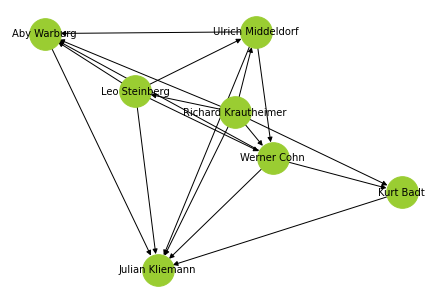

In [224]:
nx.draw(G,with_labels=True,font_size=10,node_color='yellowgreen',node_size=1000)

{('Richard Krautheimer',
  'Leo Steinberg'): Text(-0.17294867815144171, -0.24156450845794886, '1'),
 ('Richard Krautheimer',
  'Ulrich Middeldorf'): Text(-0.22654274330899044, 0.20390711178365417, '1'),
 ('Richard Krautheimer',
  'Werner Cohn'): Text(-0.2307435909406657, -0.004452383534483115, '1'),
 ('Richard Krautheimer',
  'Kurt Badt'): Text(-0.17014658239798064, 0.5370019433817955, '1'),
 ('Richard Krautheimer',
  'Aby Warburg'): Text(-0.3862397689005046, -0.4377800502952754, '1'),
 ('Richard Krautheimer',
  'Julian Kliemann'): Text(0.2877540955011102, 0.12789760403123498, '2'),
 ('Leo Steinberg',
  'Ulrich Middeldorf'): Text(-0.03994451418104199, -0.11166128343788581, '1'),
 ('Leo Steinberg',
  'Werner Cohn'): Text(-0.04414536181271729, -0.3200207787560231, '1'),
 ('Leo Steinberg',
  'Aby Warburg'): Text(-0.19964153977255616, -0.7533484455168153, '1'),
 ('Leo Steinberg',
  'Julian Kliemann'): Text(0.47435232462905863, -0.187670791190305, '1'),
 ('Ulrich Middeldorf',
  'Werner Cohn

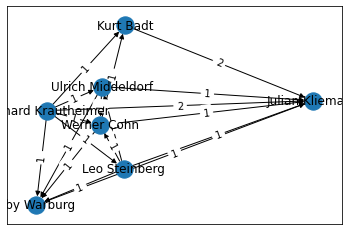

In [115]:
import matplotlib.pyplot as plt
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

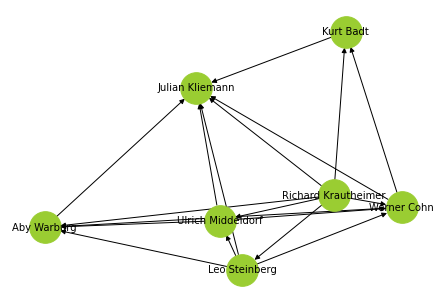

In [116]:
nx.draw(G,with_labels=True,font_size=10,node_color='yellowgreen',node_size=1000)

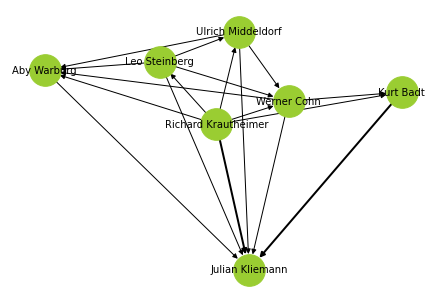

In [117]:
pos = nx.circular_layout(G)

weights = [G[u][v]['weight'] for u,v in G.edges()]

nx.draw(G, width=weights,with_labels=True,font_size=10,node_color='yellowgreen',node_size=1000)

In [118]:
list(G.nodes(data=True))

[('Richard Krautheimer', {'weight': 2}),
 ('Leo Steinberg', {'weight': 1}),
 ('Ulrich Middeldorf', {'weight': 2}),
 ('Werner Cohn', {'weight': 2}),
 ('Kurt Badt', {'weight': 3}),
 ('Aby Warburg', {'weight': 1}),
 ('Julian Kliemann', {'weight': 5})]

In [119]:
b=nx.betweenness_centrality(G)
print(b)

{'Richard Krautheimer': 0.0, 'Leo Steinberg': 0.0, 'Ulrich Middeldorf': 0.0, 'Werner Cohn': 0.06666666666666667, 'Kurt Badt': 0.0, 'Aby Warburg': 0.0, 'Julian Kliemann': 0.0}


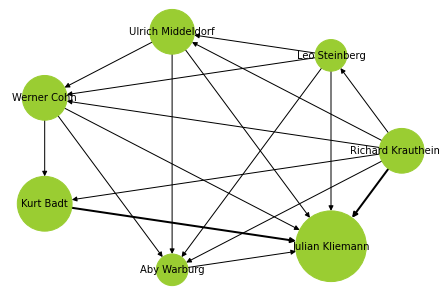

In [120]:
nx.draw(G, pos, width=weights, with_labels=True,font_size=10,node_color='yellowgreen',node_size = node_sizes)

In [121]:
G.get_edge_data()


TypeError: get_edge_data() missing 2 required positional arguments: 'u' and 'v'

In [122]:
def draw_heatmap(G, pos, measures, measure_name):
  nodes = nx.draw_networkx_nodes(G, pos, node_size = node_sizes,
                                 cmap = plt.cm.plasma,
                                 node_color = list(measures.values()),
                                 nodelist=list(measures.keys()))
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
  edges = nx.draw_networkx_labels(G, pos)
  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis("off")
  plt.show()


In [123]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



c:\program files\python36\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.



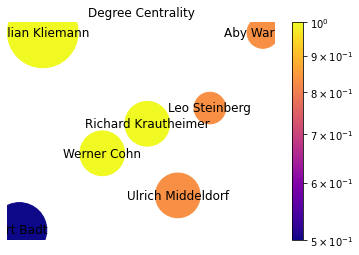

In [124]:
pos = nx.spring_layout(G)
draw_heatmap(G, pos, nx.degree_centrality(G), "Degree Centrality", )

In [225]:
query_collections= g.query(
"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX art: <https://w3id.org/artchives/>
SELECT  ?collection ?coll_name ?person
WHERE {
?person rdf:type wd:Q5;
?p wd:Q152087.
FILTER (?p = wdt:P69 || ?p = wdt:P108 || ?p = wdt:P921).
?collection wdt:P170 ?person;
rdfs:label ?coll_name.

}

""")

 
collections=dict()
for query in query_collections:
    collections[str(query[0])]= [str(query[1]).lstrip().lower(), query[2][31:]]
    
print(collections)

{'https://w3id.org/artchives/collectionnachlass-richard-krautheimer': ['nachlass richard krautheimer', 'Q90407'], 'https://w3id.org/artchives/collectionleo-steinberg-research-papers': ['leo steinberg research papers', 'Q457739'], 'https://w3id.org/artchives/collectionfondo-aby-warburg': ['fondo aby warburg', 'Q60185'], 'https://w3id.org/artchives/collectionnachlass-ulrich-middeldorf': ['nachlass ulrich middeldorf', 'Q1715096'], 'https://w3id.org/artchives/collectionulrich-middledorf-papers': ['ulrich middledorf papers', 'Q1715096'], 'https://w3id.org/artchives/collectionnachlass-werner-cohn': ['nachlass werner cohn', 'Q18935222'], 'https://w3id.org/artchives/collectionnachlass-kurt-badt': ['nachlass kurt badt', 'Q1629748'], 'https://w3id.org/artchives/collectionfototeca-julian-kliemann': ['fototeca julian kliemann', 'Q85761254']}


In [228]:
with open("artchives_output.nq", "r", encoding="utf8") as myfile:
    data = myfile.read().splitlines()
    print(data)

['<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <http://www.wikidata.org/prop/direct/P921> <http://www.wikidata.org/entity/Q5664> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <https://w3id.org/artchives/hasScopeAndContentSubject> <http://www.wikidata.org/entity/Q1404472> <https://w3id.org/artchives/1559665347-15/> .', '<http://www.wikidata.org/entity/Q49135> <http://www.w3.org/2000/01/rdf-schema#label> "              Isabella Stewart Gardner Museum"^^<http://www.w3.org/2001/XMLSchema#string> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <https://w3id.org/artchives/hasScopeAndContentSubject> <http://www.wikidata.org/entity/Q537874> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <http://www.wikidata.org/prop/direct/P921> <http://www.wikidata.org/entity/Q537874> <https://w3

In [229]:
import re
coll_dict={}
for query in query_collections:
    for line in data:
        if str(query[0]) in line:
            pattern = re.compile("\/[0-9]\d+-[0-9]\d+\/")
            a = re.findall(pattern, line)
            k= str(a)[3:-3]
            coll_dict[k] =[]
            coll_dict[k].append(str(query[0][27:]))
            coll_dict[k].append(str(query[2][31:]))
                
            
print(coll_dict)

{'1559734066-09': ['collectionnachlass-richard-krautheimer', 'Q90407'], '1599059093-1055605': ['collectionleo-steinberg-research-papers', 'Q457739'], '1598630286-3009102': ['collectionfondo-aby-warburg', 'Q60185'], '1559134510-33': ['collectionnachlass-ulrich-middeldorf', 'Q1715096'], '1598912165-7504091': ['collectionulrich-middledorf-papers', 'Q1715096'], '1602245859-1839957': ['collectionnachlass-werner-cohn', 'Q18935222'], '1594144112-97': ['collectionnachlass-kurt-badt', 'Q1629748'], '1596710882-5904682': ['collectionfototeca-julian-kliemann', 'Q85761254']}


In [230]:
def collection_info(code):
    ur = "http://artchives.fondazionezeri.unibo.it/collection-"
    url = ur+code
    response = requests.get(url)
    #to extract information to add a dictionary to the coll_dict, so to identify start and end date of a collection (for our timeline + network)
    #print(response.status_code)
    soup = BeautifulSoup(response.content)
    secTag0 = soup.find_all("section", {"class": "col-md-7"})
    for stag in secTag0:
        h3Tags = stag.find_all("h3", {"class": "articleSubtitle"})
        if len(h3Tags) > 0:
            for tag in h3Tags:
                if "Dates" in tag:
                    spanTags = stag.find_all("span")
                    for span in spanTags:
                        pattern = re.compile("[1-2]\d{3}-[1-2]\d{3}")
                        a = re.findall(pattern, str(spanTags))
                        for i in a:
                            i = i.lstrip().rstrip()
                        a = set(a)
    for k,v in coll_dict.items():
        if code == k:
            v.append(dict())
            for i in a:
                i = i.lstrip().rstrip()
                v[-1]["Start"] = i[:4]
                if len(i[:4])<4:
                    start = i[:4]
                    if start[0] == 8 or start[0] == 9:
                        start = "1"+start
                        v[-1]["Start"] = start
                    else:
                        start = "2"+start
                        v[-1]["Start"] = start
                v[-1]["End"] = i[-4:]
                if len(i[-4:])<4:
                    end = i[-4:]
                    if end[0] == 8 or end[0] == 9:
                        end = "1"+end
                        v[-1]["End"] = end
                    else:
                        end = "2"+end
                        v[-1]["End"] = end
                        
    #to produce the files to be used for the wordclouds
    ##################
    secTag = soup.find_all("section", {"class": "info-note col-md-8"})
    secTag2 = soup.find_all("section", {"class": "columns"})
    secTag3 = soup.find_all("section")
    paraTag = soup.find_all("p", {"class": "info-url"})
    titletag = soup.find_all("h2", {"class": "articleTitle"})
    my_text=[]
    for title in titletag:
        my_text.append(title.text)
    for tag in secTag:
        pTags = tag.find_all("p")
        for tag in pTags:
            my_text.append(tag.text)
    for tag in secTag2:
        h3Tags = tag.find_all("h3", {"class": "articleSubtitle"})
        if len(h3Tags)> 0:
            pTags2 = tag.find_all("p")
            for tag in pTags2:
                my_text.append(tag.text)
    for tag in secTag3:
        h3Tags = tag.find_all("h3", {"class": "articleSubtitle"})
        if len(h3Tags) > 0:
            for tag in h3Tags:
                if "arrangement" in tag:
                    pTags3 = tag.find_all("p")
                    for tag in pTags3:
                        my_text.append(tag.text)
    for p in paraTag:
        my_text.append(p.text)
    ###################
    my_text= " ".join(my_text)
    return my_text


for k, v in coll_dict.items():
    file_name = v[0]
    file = open("wcloudstexts/" + file_name + ".txt","w")
    file.write(collection_info(k))
    file.close()
    
print(coll_dict)

{'1559734066-09': ['collectionnachlass-richard-krautheimer', 'Q90407', {'Start': '1943', 'End': '2003'}], '1599059093-1055605': ['collectionleo-steinberg-research-papers', 'Q457739', {'Start': '1945', 'End': '1996'}], '1598630286-3009102': ['collectionfondo-aby-warburg', 'Q60185', {'Start': '1903', 'End': '1927'}], '1559134510-33': ['collectionnachlass-ulrich-middeldorf', 'Q1715096', {'Start': '1957', 'End': '1968'}], '1598912165-7504091': ['collectionulrich-middledorf-papers', 'Q1715096', {'Start': '1925', 'End': '1981'}], '1602245859-1839957': ['collectionnachlass-werner-cohn', 'Q18935222', {'Start': '1931', 'End': '1960'}], '1594144112-97': ['collectionnachlass-kurt-badt', 'Q1629748', {'Start': '1937', 'End': '1949'}], '1596710882-5904682': ['collectionfototeca-julian-kliemann', 'Q85761254', {'Start': '1980', 'End': '2015'}]}


In [231]:
activity_span=dict()
for k,v in coll_dict.items():
    key_set.add(v[1])
key_list=list(key_set)
for i in key_list:
    for k,v in coll_dict.items():
        if v[1] == i:
            if i not in activity_span:
                activity_span[i]=dict()
                activity_span[i]["Start"]=[]
                activity_span[i]["Start"].append(int(v[2]["Start"]))
                activity_span[i]["End"]=[]
                activity_span[i]["End"].append(int(v[2]["End"]))
                

            else:
                activity_span[i]["Start"].append(int(v[2]["Start"]))
                activity_span[i]["End"].append(int(v[2]["End"]))

print(activity_span)


activity_tuple_dict=dict()
for k,v in key_global_occurrences.items():
    for i, j in activity_span.items():
        if k == i:
            activity_tuple_dict[v[0]]=(min(j["Start"]), max(j["End"]))

print(activity_tuple_dict)
for i in activity_tuple_dict.keys():
    print(i)

{'Q457739': {'Start': [1945], 'End': [1996]}, 'Q90407': {'Start': [1943], 'End': [2003]}, 'Q1629748': {'Start': [1937], 'End': [1949]}, 'Q85761254': {'Start': [1980], 'End': [2015]}, 'Q18935222': {'Start': [1931], 'End': [1960]}, 'Q60185': {'Start': [1903], 'End': [1927]}, 'Q1715096': {'Start': [1957, 1925], 'End': [1968, 1981]}}
{'Richard Krautheimer': (1943, 2003), 'Leo Steinberg': (1945, 1996), 'Ulrich Middeldorf': (1925, 1981), 'Werner Cohn': (1931, 1960), 'Kurt Badt': (1937, 1949), 'Aby Warburg': (1903, 1927), 'Julian Kliemann': (1980, 2015)}
Richard Krautheimer
Leo Steinberg
Ulrich Middeldorf
Werner Cohn
Kurt Badt
Aby Warburg
Julian Kliemann


In [139]:
coex_dict={}
for k,v in activity_tuple_dict.items():
    for x,y in activity_tuple_dict.items():
        if k != x:
            if v[0]>=y[0]: #per lo start del periodo di co-esistenza lavortiva prendo la data più alta
                s=v[0]
            else:
                s=y[0]
            if v[1]<=y[1]: #per l'end prendo data più bassa
                e=v[1]
            else:
                e=y[1]
            if e-s <= 0:
                coex = 0
            else:
                coex = e-s
            w = coex /10 #per mantenere il peso proporzionale a quello attribuito al legame tra tematiche condivise
            coex_dict[(k,x)] = w

print(coex_dict)
            
                

{('Richard Krautheimer', 'Leo Steinberg'): 5.1, ('Richard Krautheimer', 'Ulrich Middeldorf'): 3.8, ('Richard Krautheimer', 'Werner Cohn'): 1.7, ('Richard Krautheimer', 'Kurt Badt'): 0.6, ('Richard Krautheimer', 'Aby Warburg'): 0.0, ('Richard Krautheimer', 'Julian Kliemann'): 2.3, ('Leo Steinberg', 'Richard Krautheimer'): 5.1, ('Leo Steinberg', 'Ulrich Middeldorf'): 3.6, ('Leo Steinberg', 'Werner Cohn'): 1.5, ('Leo Steinberg', 'Kurt Badt'): 0.4, ('Leo Steinberg', 'Aby Warburg'): 0.0, ('Leo Steinberg', 'Julian Kliemann'): 1.6, ('Ulrich Middeldorf', 'Richard Krautheimer'): 3.8, ('Ulrich Middeldorf', 'Leo Steinberg'): 3.6, ('Ulrich Middeldorf', 'Werner Cohn'): 2.9, ('Ulrich Middeldorf', 'Kurt Badt'): 1.2, ('Ulrich Middeldorf', 'Aby Warburg'): 0.2, ('Ulrich Middeldorf', 'Julian Kliemann'): 0.1, ('Werner Cohn', 'Richard Krautheimer'): 1.7, ('Werner Cohn', 'Leo Steinberg'): 1.5, ('Werner Cohn', 'Ulrich Middeldorf'): 2.9, ('Werner Cohn', 'Kurt Badt'): 1.2, ('Werner Cohn', 'Aby Warburg'): 0.0, 

In [ ]:
#per aggiornare peso dei nodi si può considerare l'intervallo totale delle collezioni e dare un valore alla durata dell'attività

In [232]:
#update the weight of the edges
for e in G.edges():
    for k,v in cointerest_counts.items():
        if e[0] == k and e[1] in v.keys():
            G[e[0]][e[1]]['weight'] = v[e[1]]

for e in G.edges():
    print(G.get_edge_data(e[0],e[1]))
    
    
for e in G.edges():
    for y,x in coex_dict.items():
        if e == y:
            G[e[0]][e[1]]['weight'] += x #adding the value of the co-existence of careers to the value of shared periods of interest

for e in G.edges():
    print(G.get_edge_data(e[0],e[1]))

{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 2}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 2}
{'weight': 1}
{'weight': 6.1}
{'weight': 4.8}
{'weight': 2.7}
{'weight': 1.6}
{'weight': 1.0}
{'weight': 4.3}
{'weight': 4.6}
{'weight': 2.5}
{'weight': 1.0}
{'weight': 2.6}
{'weight': 3.9}
{'weight': 1.2}
{'weight': 1.1}
{'weight': 2.2}
{'weight': 1.0}
{'weight': 1.0}
{'weight': 2.0}
{'weight': 1.0}


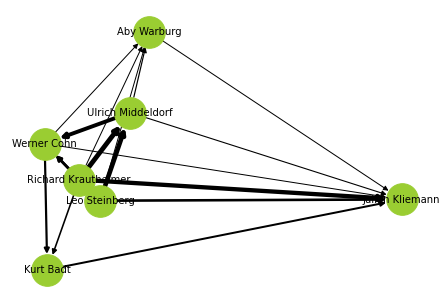

In [148]:
pos = nx.circular_layout(G)

weights = [G[u][v]['weight'] for u,v in G.edges()]

nx.draw(G, width=weights,with_labels=True,font_size=10,node_color='yellowgreen',node_size=1000)

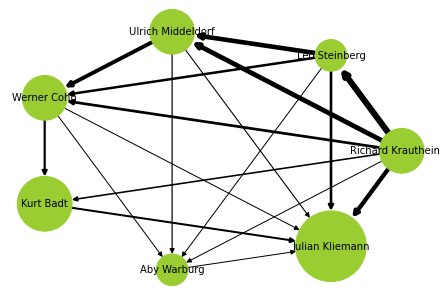

In [149]:
nx.draw(G, pos, width=weights, with_labels=True,font_size=10,node_color='yellowgreen',node_size = node_sizes)

In [233]:
node_sizes=[]
#betweenness = []
for k,v in interest_counts.items():
    for n in G.nodes():
        if n == k:
            G.nodes[n]["weight"] = v
            node_sizes.append(v*1000)
print(node_sizes)

#here we go to update the dimension of node, calculating the length of time of activity over the total time-span covered by all the collections

start_list=[]
end_list=[]

for k,v in activity_tuple_dict.items():
    start_list.append(v[0])
    end_list.append(v[1])

total_timespan = max(end_list) - min(start_list)
print(total_timespan)

node_sizes=[]
#svoto la lista dei pesi dei nodi fatta precedentemente e la riempo nuovamente con i valori aggiornati
for k,v in activity_tuple_dict.items():
    activity_period= v[1]-v[0]
    for n in G.nodes():
        if n == k:
            G.nodes[n]["weight"] += activity_period/total_timespan #updates i valori precedentemente ottenuti solo col numero di tematiche di ricerca
            i = G.nodes[n]["weight"]
    node_sizes.append(i*1000)
print(node_sizes)
    

    


[2000, 1000, 2000, 2000, 3000, 1000, 5000]
112
[2535.714285714286, 1455.357142857143, 2500.0, 2258.9285714285716, 3107.1428571428573, 1214.2857142857142, 5312.5]


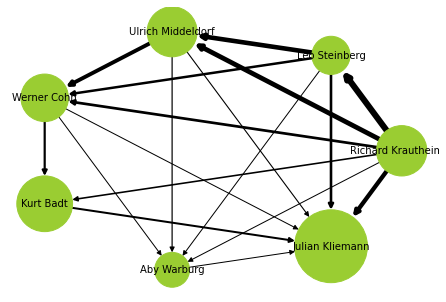

In [155]:
nx.draw(G, pos, width=weights, with_labels=True,font_size=10,node_color='yellowgreen',node_size = node_sizes)

In [161]:
print(G.nodes(data=True)) #restituisce lista di tuple, dove primo elemento (i[0]) è nodo (id) e secondo elemento (i[1]) è dizionario con dentro i valori degli attributi, nel nostro caso solo il peso, che è il valore della chiave "weight". se vuoi estrarlo automaticamente devi prima iterare su ogni tupla della lista, poi per ogni chiave valore (nel nostro caso solo una coppia) prendere il valore, che è il peso numerico

[('Richard Krautheimer', {'weight': 2.5357142857142856}), ('Leo Steinberg', {'weight': 1.4553571428571428}), ('Ulrich Middeldorf', {'weight': 2.5}), ('Werner Cohn', {'weight': 2.2589285714285716}), ('Kurt Badt', {'weight': 3.107142857142857}), ('Aby Warburg', {'weight': 1.2142857142857142}), ('Julian Kliemann', {'weight': 5.3125})]


In [ ]:
#to create csv file
triples_as_list = list()
triples_as_list.append("source,target,weight\n")
for e in G.edges():
    source = str(e[0]).strip().replace("\n", "")
    target = str(e[1]).strip().replace("\n", "")
    weight = str(G.get_edge_data(e[0],e[1])["weight"]).strip().replace("\n", "")
    triple_as_str = source + "," + target + "," + weight + "\n"
    triples_as_list.append(triple_as_str)
#restituisce direttamente per ogni edge in G

In [ ]:
import io
with io.open("edge_1list.csv", "w", encoding="utf-8") as writer:
    # dict_writer.writerows(triples_as_list)
    for line in triples_as_list:
        writer.write(line)

In [166]:
#to create csv file
triples_as_list = list()
triples_as_list.append("id\n")
for g in G.nodes():
    id = str(g).strip().replace("\n", "")
    triple_as_str = id+ "\n"
    triples_as_list.append(triple_as_str)
#restituisce direttamente per ogni edge in G.edges() la tupla dei due nodi collegati e un dizionario con unica chiave "weight" e valore valore numerico del peso

In [167]:
import io
with io.open("node_list.csv", "w", encoding="utf-8") as writer:
    # dict_writer.writerows(triples_as_list)
    for line in triples_as_list:
        writer.write(line)

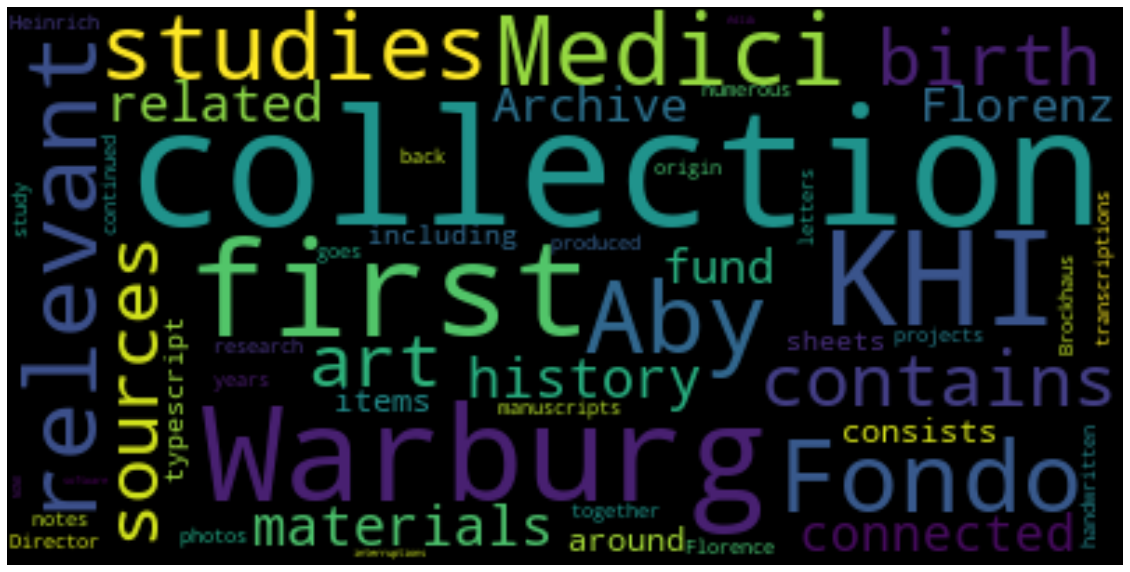

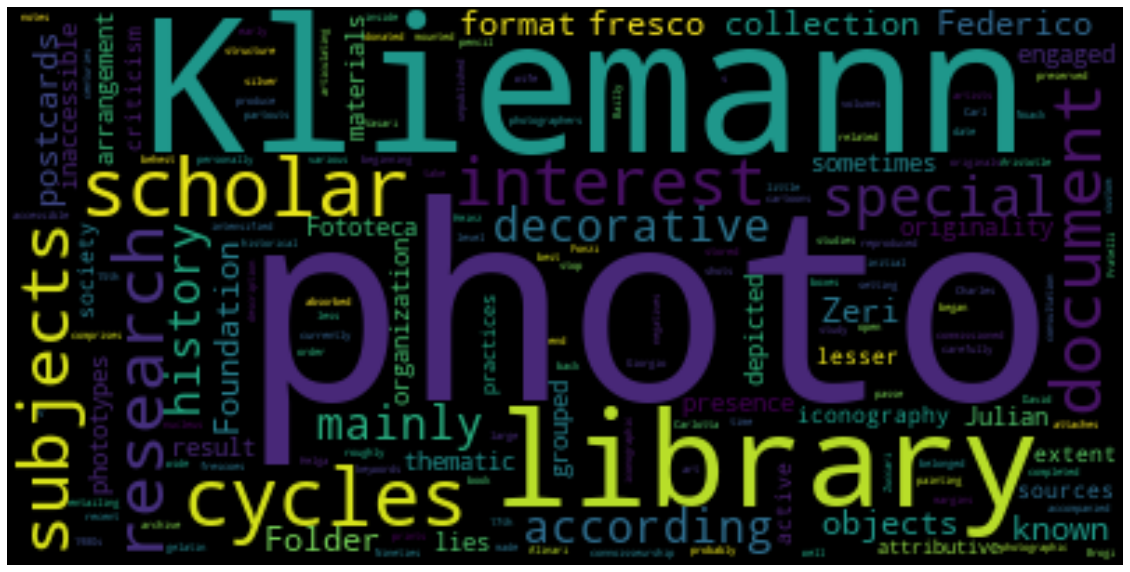

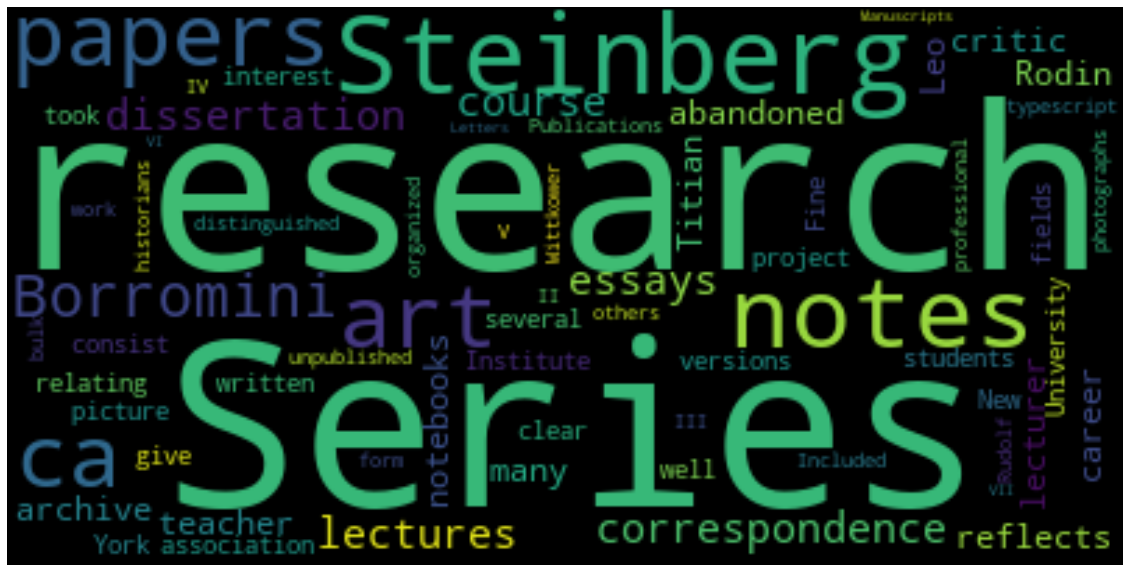

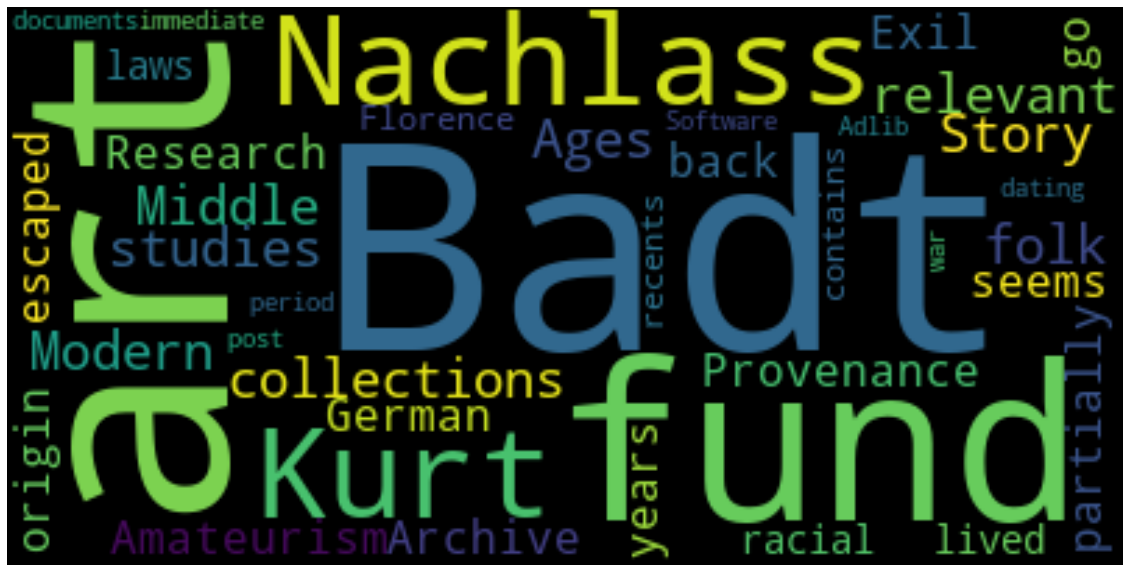

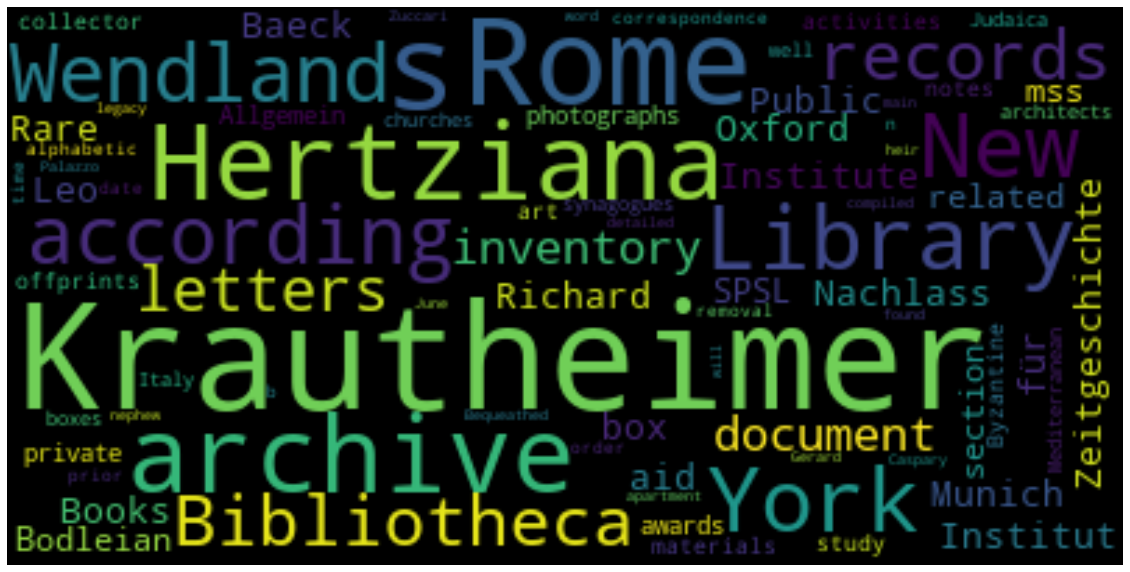

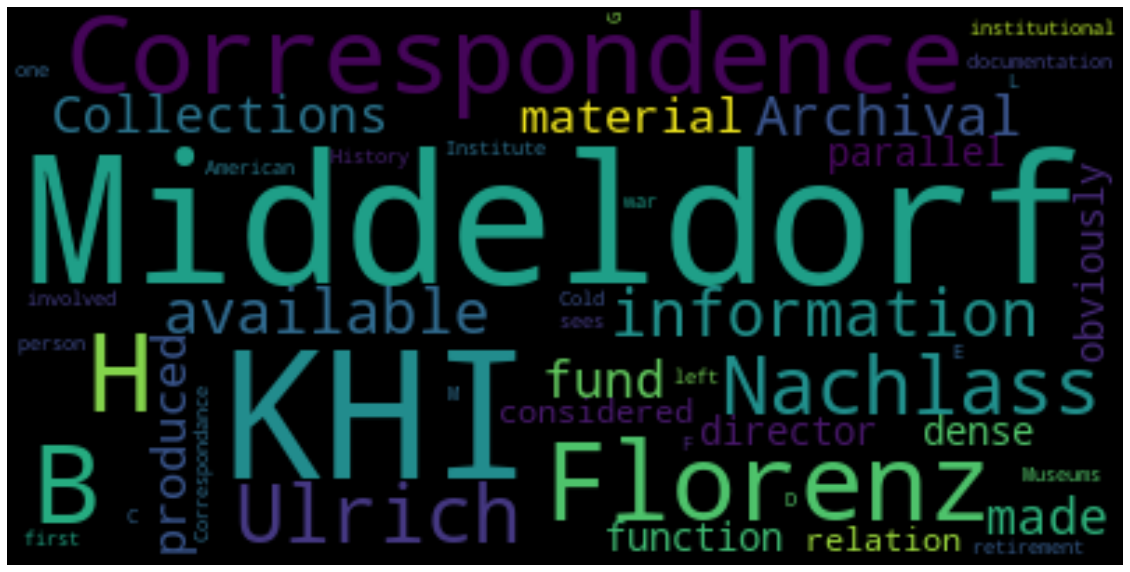

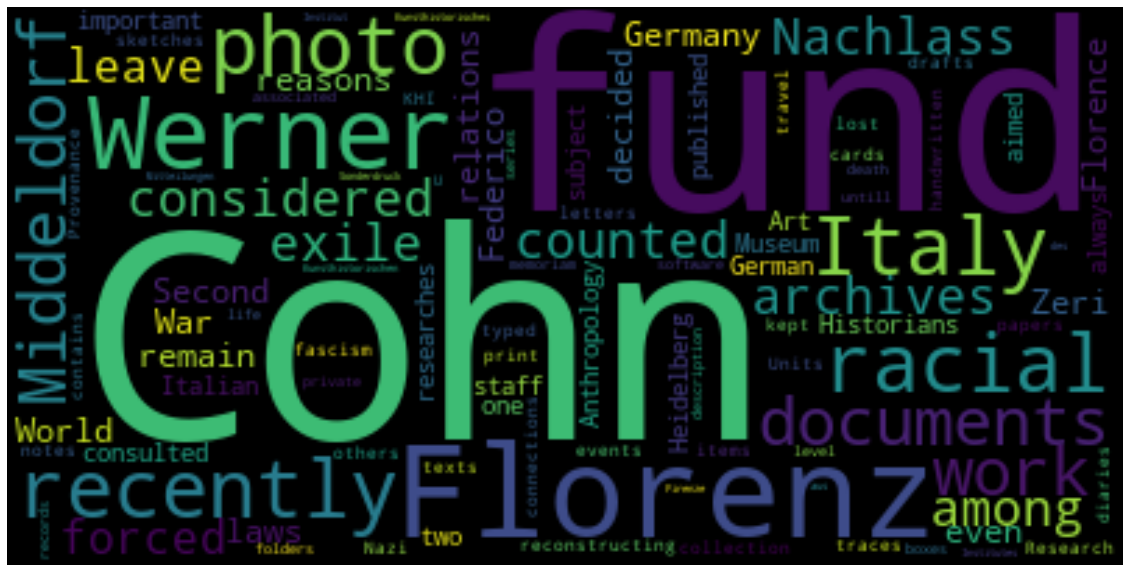

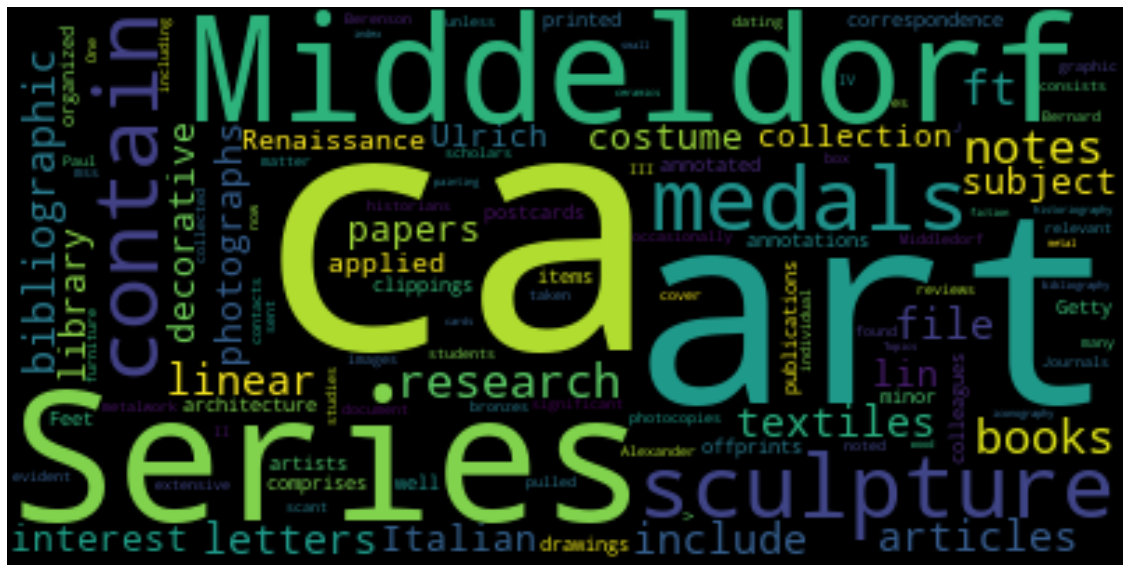

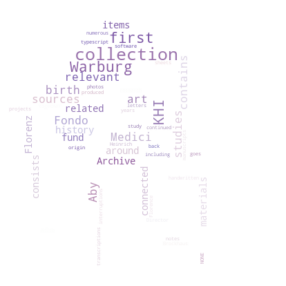

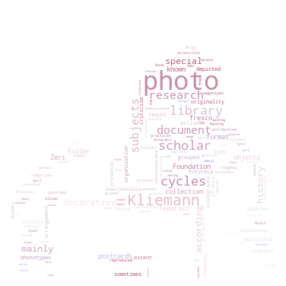

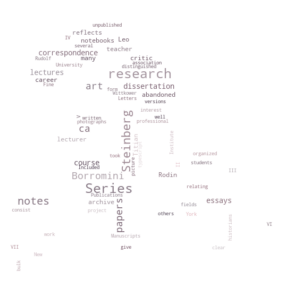

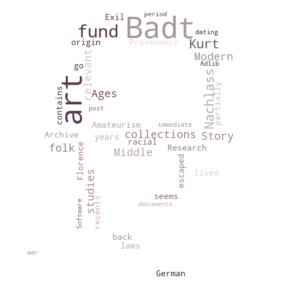

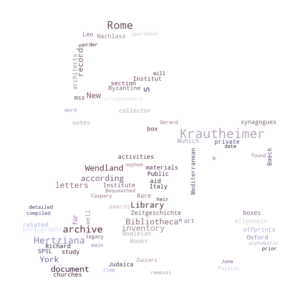

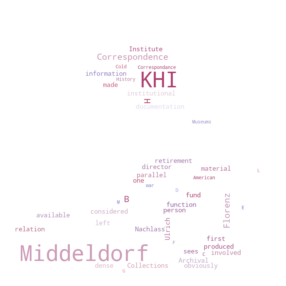

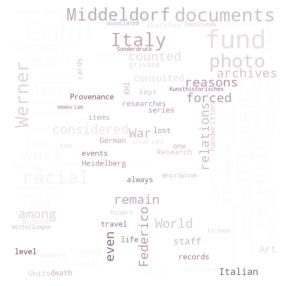

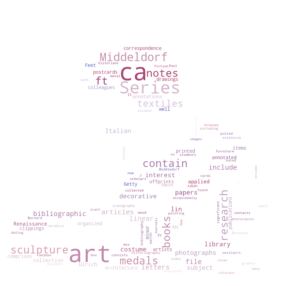

In [72]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

def create_wc_basic(file):
    f = open(file, "r")
    t = str(f.read())
    stopwords = set(STOPWORDS)
    # Create a word cloud image
    wc = WordCloud(background_color="black", max_words=1000,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')
    # Generate a wordcloud
    wc.generate(t)
    # store to file
    wc.to_file("wcloudstexts/img/" + file[17:-4] +".png")
    # show
    plt.figure(figsize=[20,20])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

from pathlib import Path

#iterate over a folder
pathlist = Path("wcloudstexts").rglob('*.txt')
for path in pathlist:
    path_in_str = str(path)
    create_wc_basic(path_in_str)
    

def create_wc(file,img):
    f = open(file, "r")
    t = str(f.read())
    stopwords = set(STOPWORDS)
    # Create a word cloud image
    mask = np.array(Image.open(img))
    wordcloud_usa = WordCloud(stopwords=stopwords,max_font_size=70, background_color="white", mode="RGBA", max_words=1500, mask=mask).generate(t)
    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[5,5])
    plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.savefig("wcloudstexts/img2/" + file[17:-4] +".png", format="png")
    plt.show()


pathlist = Path("wcloudstexts").rglob('*.txt')
for path in pathlist:
    path_in_str = str(path)
    for k,v in coll_dict.items():
        if v[0] in path_in_str:
            my_img = "wcloudstexts\drawings/" + v[1] + ".jpg" 
    create_wc(path_in_str, my_img)

